# Capstone Pre-processing and Training Data Development- Jessica Williams

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from sb_utils import save_file

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVR

First let’s import the data we worked with in the EDA portion.

In [3]:
recipe_attributes1 = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes1.csv')

In [4]:
recipe_attributes2 = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes2.csv')

In [5]:
recipe_attributes3 = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes3.csv')

In [6]:
recipe_attributes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231634 entries, 0 to 231633
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   recipe_id      231634 non-null  int64  
 1   minutes        231634 non-null  int64  
 2   n_steps        231634 non-null  float64
 3   n_ingredients  231634 non-null  float64
 4   rating_mean    231634 non-null  float64
 5   review_count   231634 non-null  int64  
 6   polarity_avg   231634 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 12.4 MB


In [7]:
recipe_attributes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231634 entries, 0 to 231633
Columns: 212 entries, recipe_id to ingr_wine
dtypes: float64(211), int64(1)
memory usage: 374.7 MB


In [8]:
recipe_attributes3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   recipe_id                   231637 non-null  int64  
 1   rating_mean                 231637 non-null  float64
 2   polarity_avg                231637 non-null  float64
 3   ingr_baking powder          231637 non-null  int64  
 4   ingr_baking soda            231637 non-null  int64  
 5   ingr_black pepper           231637 non-null  int64  
 6   ingr_brown sugar            231637 non-null  int64  
 7   ingr_cheddar cheese         231637 non-null  int64  
 8   ingr_cream cheese           231637 non-null  int64  
 9   ingr_garlic cloves          231637 non-null  int64  
 10  ingr_ground black           231637 non-null  int64  
 11  ingr_lemon juice            231637 non-null  int64  
 12  ingr_olive oil              231637 non-null  int64  
 13  ingr_parmesan 

Next let’s create a dataframe that includes the numeric features that we narrowed done in the EDA portion.

In [9]:
#recipe_attributes_sub3.drop(to_drop, axis=1, inplace=True)

recipe_attributes3=recipe_attributes3.drop(['rating_mean','polarity_avg'],axis=1)

In [10]:
#recipe_attributes_p=pd.concat([recipe_attributes1, recipe_attributes3], axis=1)
recipe_attributes_p=recipe_attributes1.merge(recipe_attributes3,on='recipe_id')

In [11]:
recipe_attributes_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231634 entries, 0 to 231633
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   recipe_id                   231634 non-null  int64  
 1   minutes                     231634 non-null  int64  
 2   n_steps                     231634 non-null  float64
 3   n_ingredients               231634 non-null  float64
 4   rating_mean                 231634 non-null  float64
 5   review_count                231634 non-null  int64  
 6   polarity_avg                231634 non-null  float64
 7   ingr_baking powder          231634 non-null  int64  
 8   ingr_baking soda            231634 non-null  int64  
 9   ingr_black pepper           231634 non-null  int64  
 10  ingr_brown sugar            231634 non-null  int64  
 11  ingr_cheddar cheese         231634 non-null  int64  
 12  ingr_cream cheese           231634 non-null  int64  
 13  ingr_garlic cl

In [12]:
recipe_attributes_p.shape

(231634, 59)

Next we can start working on creating a train and test set for our new recipe attributes dataframe

In [13]:
len(recipe_attributes_p) * .7, len(recipe_attributes_p) * .3

(162143.8, 69490.2)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(recipe_attributes_p.drop(columns='rating_mean'), 
                                                    recipe_attributes_p.rating_mean, test_size=0.3, 
                                                    random_state=22)

In [15]:
X_train.shape, X_test.shape

((162143, 58), (69491, 58))

In [16]:
y_train.shape, y_test.shape

((162143,), (69491,))

I already have a dataframe that pretty much only includes numeric variables. The only column that should be dropped here is the recipe id column at it is the identifier variable for the recipes.

In [17]:
#Code task 1#
#Save the 'Name', 'state', and 'Region' columns from the train/test data into names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
#names_list = ['Name', 'state', 'Region']
#names_train = X_train[names_list]
#names_test = X_test[names_list]
#X_train.drop(columns=names_list, inplace=True)
#X_test.drop(columns=names_list, inplace=True)
#X_train.shape, X_test.shape


id_vars = ['recipe_id']
id_train = X_train[id_vars]
id_test = X_test[id_vars]
X_train.drop(columns=id_vars, inplace=True)
X_test.drop(columns=id_vars, inplace=True)
X_train.shape, X_test.shape

((162143, 57), (69491, 57))

In [18]:
X_train.dtypes

minutes                         int64
n_steps                       float64
n_ingredients                 float64
review_count                    int64
polarity_avg                  float64
ingr_baking powder              int64
ingr_baking soda                int64
ingr_black pepper               int64
ingr_brown sugar                int64
ingr_cheddar cheese             int64
ingr_cream cheese               int64
ingr_garlic cloves              int64
ingr_ground black               int64
ingr_lemon juice                int64
ingr_olive oil                  int64
ingr_parmesan cheese            int64
ingr_purpose flour              int64
ingr_salt pepper                int64
ingr_sour cream                 int64
ingr_vanilla extract            int64
ingr_vegetable oil              int64
step_10 minutes                 int64
step_15 minutes                 int64
step_30 minutes                 int64
step_bring boil                 int64
step_large bowl                 int64
step_medium 

In [19]:
X_test.dtypes

minutes                         int64
n_steps                       float64
n_ingredients                 float64
review_count                    int64
polarity_avg                  float64
ingr_baking powder              int64
ingr_baking soda                int64
ingr_black pepper               int64
ingr_brown sugar                int64
ingr_cheddar cheese             int64
ingr_cream cheese               int64
ingr_garlic cloves              int64
ingr_ground black               int64
ingr_lemon juice                int64
ingr_olive oil                  int64
ingr_parmesan cheese            int64
ingr_purpose flour              int64
ingr_salt pepper                int64
ingr_sour cream                 int64
ingr_vanilla extract            int64
ingr_vegetable oil              int64
step_10 minutes                 int64
step_15 minutes                 int64
step_30 minutes                 int64
step_bring boil                 int64
step_large bowl                 int64
step_medium 

Now that we have the train test split set up I will create a pipeline based on imputing the mean as my base linear regression pipeline.

In [20]:
pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LinearRegression()
)

In [21]:
type(pipe)

sklearn.pipeline.Pipeline

In [22]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [24]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

Lets see how the first model performed.

Using $R^2$

In [25]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06958851821260514, 0.06378735916930367)

It looks like the r2 score for the model is extremely low.The score for the train and test set are very similar.

Using Mean Absolute Error

In [26]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6466426445454803, 0.6420365805554163)

From this statistic we can see that on average, using the mean would generally give us a values that is off by about .64. With the range of values we are dealing with (0-5) this is pretty significant.

Using Mean Squared Error

In [27]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.9183780496223652, 0.9073595862700459)

In [28]:

np.sqrt([mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)])

array([0.95832043, 0.95255424])

This statistic gives us a smaller error on the test set than the train set but not by much.

Next, let’s create a pipeline that uses the most frequent value of the column to impute values.

In [29]:
pipe2 = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    LinearRegression()
)

In [30]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [31]:
y_tr_pred = pipe2.predict(X_train)
y_te_pred = pipe2.predict(X_test)

In [32]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06958851821260514, 0.06378735916930367)

In [33]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6466426445454803, 0.6420365805554163)

In [34]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.9183780496223652, 0.9073595862700459)

In [35]:
np.sqrt([mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)])

array([0.95832043, 0.95255424])

It looks like we get the exact same values as we did using the mean. How can that be? 

In [36]:
counts = recipe_attributes_p.isna().sum()
print(counts.sum())

0


In hindsight I already handled all missing values for this dataset. So each imputer value creates the same statistics because there were no values to impute.

It’s time to start refining the model and selecting features.

In [37]:
pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression),
    LinearRegression()
)

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x0000024D82FD3700>)),
                ('linearregression', LinearRegression())])

In [39]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [40]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06663060309278446, 0.06151349741959233)

In [41]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6479478379980013, 0.6432776278982002)

These values aren’t much different than the values we got using all the features. Let’s try a different number of features

In [42]:
pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression,k=20),
    LinearRegression()
)

In [43]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_regression at 0x0000024D82FD3700>)),
                ('linearregression', LinearRegression())])

In [44]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [45]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06799402366461238, 0.062257309606375544)

In [46]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6474116176208882, 0.6429011599748883)

This values still sit in about the same place. Maybe if we decrease the number of features?

In [47]:
pipe = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression,k=6),
    LinearRegression()
)

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x0000024D82FD3700>)),
                ('linearregression', LinearRegression())])

In [49]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [50]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.06566141017863558, 0.06067706838630238)

In [51]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.6479296909101954, 0.6432419933554209)

Lets assess our model features with a GridSearchCV.

In [52]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [53]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [54]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=6,
                                                    score_func=<function f_regression at 0x0000024D82FD3700>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [55]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [56]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 54}

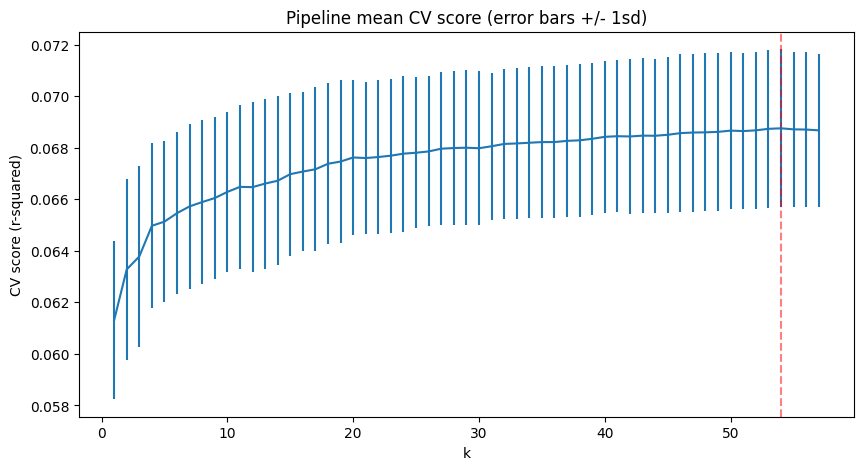

In [57]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The grid search suggests that the k best parameters is 54. This could explain why the model performance when trying to scale down the parameters weren’t much different from using all of them. The suggested number of parameters are almost all of the features (54 of 57).

In [58]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

It’s starting to look like our features don’t have a ton of predictive power. Let’s experiment with a different model. 

In [59]:
#use random state for this model
regr = make_pipeline(StandardScaler(),
    LinearSVR(random_state=22))

In [60]:
regr.fit(X_train, y_train)

C:\Users\jwatki8\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jwatki8\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=22))])

In [61]:
y_tr_pred = regr.predict(X_train)
y_te_pred = regr.predict(X_test)

In [62]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(-0.03756717115875707, -0.042910640461982785)

In [63]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.602949850377678, 0.5995707571497682)